In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = '/content/healthcare-dataset-stroke-data.csv'  # Update the file path if needed
data = pd.read_csv(file_path)

In [3]:
# Explore the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
# Handle missing values (drop rows with missing values for simplicity)
data = data.dropna()

In [5]:
# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [6]:
# Separate features and target variable
X = data.drop(columns=['stroke'])  # Assuming 'stroke' is the target column
y = data['stroke']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9195519348268839

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       929
           1       0.14      0.09      0.11        53

    accuracy                           0.92       982
   macro avg       0.54      0.53      0.54       982
weighted avg       0.91      0.92      0.91       982

Confusion Matrix:
 [[898  31]
 [ 48   5]]


In [10]:
# Visualize the Decision Tree (text format)
tree_rules = export_text(model, feature_names=list(X.columns))
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- age <= 66.50
|   |--- age <= 44.50
|   |   |--- avg_glucose_level <= 58.11
|   |   |   |--- avg_glucose_level <= 58.06
|   |   |   |   |--- avg_glucose_level <= 57.92
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_glucose_level >  57.92
|   |   |   |   |   |--- avg_glucose_level <= 57.94
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- avg_glucose_level >  57.94
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- avg_glucose_level >  58.06
|   |   |   |   |--- class: 1
|   |   |--- avg_glucose_level >  58.11
|   |   |   |--- age <= 38.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  38.50
|   |   |   |   |--- work_type <= 2.50
|   |   |   |   |   |--- bmi <= 26.35
|   |   |   |   |   |   |--- bmi <= 26.25
|   |   |   |   |   |   |   |--- bmi <= 25.35
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- bmi >  25.35
|   |   |   |   |   |   |   |   |--- bmi <= 25.45
|   |   |   |   |   |   |   |   |

In [11]:
# Save the trained model
import joblib
joblib.dump(model, '/content/decision_tree_model.pkl')
print("Decision Tree model saved as 'decision_tree_model.pkl'.")

Decision Tree model saved as 'decision_tree_model.pkl'.


In [13]:
# Predict probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [14]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

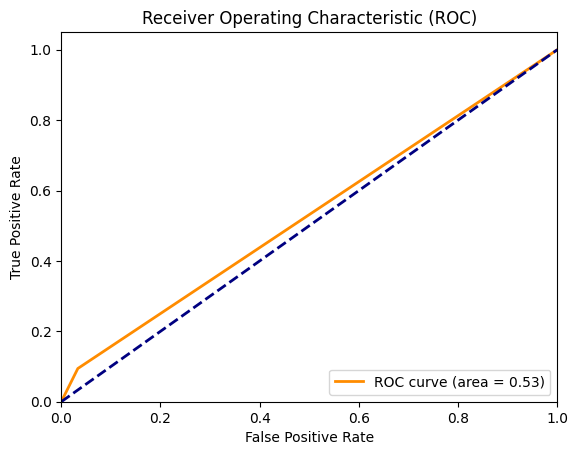

In [15]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()